# Correlation heatmaps (screen hours vs wellness factors)


In [63]:
import numpy as np
import pandas as pd

In [65]:
df=pd.read_csv("ScreenTime vs MentalWellness.csv")

In [67]:
df.head(3)

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN


In [69]:
df.isnull().sum()

user_id                          0
age                              0
gender                           0
occupation                       0
work_mode                        0
screen_time_hours                0
work_screen_hours                0
leisure_screen_hours             0
sleep_hours                      0
sleep_quality_1_5                0
stress_level_0_10                0
productivity_0_100               0
exercise_minutes_per_week        0
social_hours_per_week            0
mental_wellness_index_0_100      0
Unnamed: 15                    400
dtype: int64

In [71]:
df=df.drop(columns=["Unnamed: 15","user_id"])

In [73]:
df.head(3)

,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
num_data = df.select_dtypes(include=["int64", "float64"])

In [81]:
corr = num_data.corr()

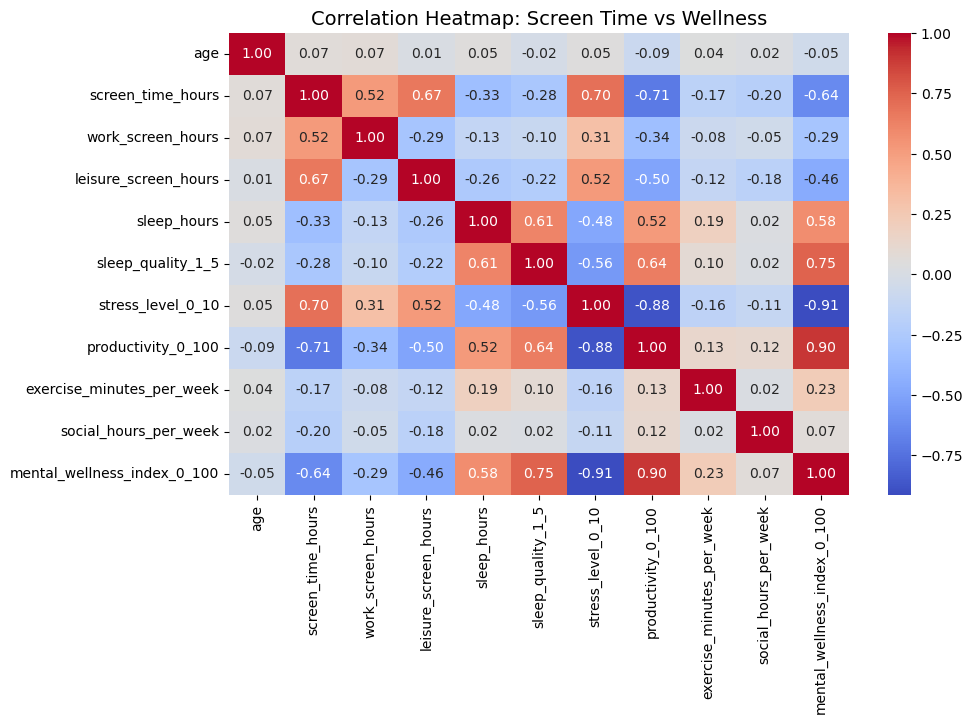

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Screen Time vs Wellness", fontsize=14)
plt.show()

# Q.2 Regression models to predict sleep quality or stress

In [85]:
df=pd.get_dummies(df,columns=["gender","work_mode",])

In [87]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["occupation"]=oe.fit_transform(df[["occupation"]])

In [89]:
df.head(2)

,age,occupation,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,gender_Female,gender_Male,gender_Non-binary/Other,work_mode_Hybrid,work_mode_In-person,work_mode_Remote
0,33,0.0,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,True,False,False,False,False,True
1,28,0.0,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,True,False,False,False,True,False


In [91]:
df=df.astype(int)

In [93]:
df.head(2)

,age,occupation,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,gender_Female,gender_Male,gender_Non-binary/Other,work_mode_Hybrid,work_mode_In-person,work_mode_Remote
0,33,0,10,5,5,6,1,9,44,127,0,9,1,0,0,0,0,1
1,28,0,7,0,7,8,3,5,78,74,2,56,1,0,0,0,1,0


In [95]:
df["sleep_quality_1_5"].value_counts()

sleep_quality_1_5
1    275
2     94
3     28
4      3
Name: count, dtype: int64

In [97]:
x=df.drop(columns="sleep_quality_1_5")
y=df["sleep_quality_1_5"]

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,k_neighbors=2)
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

In [107]:
y_resampled.value_counts()

sleep_quality_1_5
1    222
3    222
2    222
4    222
Name: count, dtype: int64

In [145]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_resampled,y_resampled)

DecisionTreeRegressor()

In [147]:
y_pred=dt.predict(x_test)

In [149]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.021164021164021052

In [151]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_resampled,y_resampled)

RandomForestRegressor()

In [153]:
y_pred_random=rfr.predict(x_test)

In [155]:
r2_score(y_test,y_pred_random)

0.5502275132275133

# Q.3 Clustering users into "healthy balance" vs "high risk" digital habits

In [160]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [162]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    model.fit(df[["screen_time_hours", "mental_wellness_index_0_100"]])
    wcss.append(model.inertia_)

C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

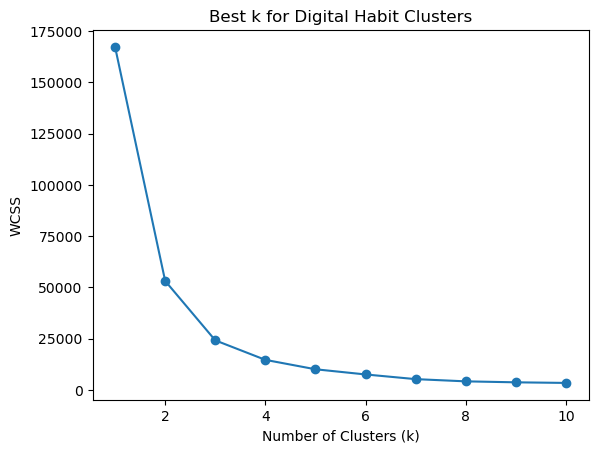

In [174]:
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Best k for Digital Habit Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [166]:
model = KMeans(n_clusters=2, init="k-means++", random_state=42)
y_pred = model.fit_predict(df[["screen_time_hours", "mental_wellness_index_0_100"]])

C:\Users\shaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


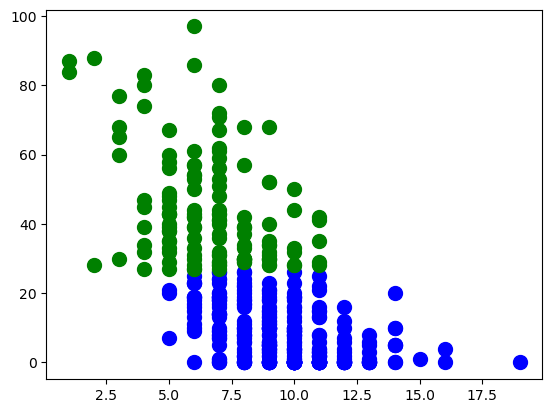

In [168]:
plt.scatter(df["screen_time_hours"][y_pred == 0], 
            df["mental_wellness_index_0_100"][y_pred == 0],
            s=100, c="blue", label="Cluster 1")

plt.scatter(df["screen_time_hours"][y_pred == 1], 
            df["mental_wellness_index_0_100"][y_pred == 1],
            s=100, c="green", label="Cluster 2")